# 📚 Desvio Padrão Conhecido ou Desconhecido

Ao aplicar qualquer teste para comparar médias, devemos considerar se o desvio padrão populacional (σ) é conhecido ou não. Isso determina o tipo de teste que utilizamos:

# ✅ Desvio padrão populacional conhecido

Situação rara na prática — ocorre geralmente em experimentos controlados ou quando há dados históricos confiáveis da população (seja normal ou n ≥ 30). Neste caso, usamos o teste z para a média (z-test). Distribuição usada: normal padrão (Z).

**🎯 Cenário:**

Um hospital afirma que a média da pressão arterial sistólica de seus pacientes hipertensos controlados é menor que 120 mmHg, conforme meta do protocolo clínico. Para verificar essa afirmação: Coletou-se uma amostra aleatória de 36 pacientes. Obteve-se uma média amostral de 117 mmHg. Assume-se que o desvio padrão populacional é conhecido e igual a 4 mmHg. Deseja-se verificar, com nível de significância de 5%, se essa média é estatisticamente menor que 120 mmHg.

#### 🧪 Especifique as Hipóteses

Queremos verificar se os pacientes do hospital têm pressão arterial sistólica média menor que 120 mmHg, conforme as diretrizes clínicas.

* H₀ (Hipótese nula): μ ≥ 120 mmHg
* H₁ (Hipótese alternativa): μ < 120 mmHg

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

####🧮 Passo 3 – Escolha o Teste Adequado

Como temos:
* 1 amostra
* A variável é quantitativa contínua (pressão arterial)
* A amostra é aleatória e de tamanho razoável (n = 36 ≥ 30)
* O desvio padrão populacional é conhecido (σ = 4)

➡️ Usaremos o teste Z para uma amostra (one-sample z-test)

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

Para o primeiro caso (teste Z para uma média com desvio padrão populacional conhecido), não existe uma função direta e pronta no scipy.stats, por isso iremos calcular manualmente, como tínhamos feito até então

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [ ]:
# Dados do exemplo em saúde
mu = 120  # valor de referência para pressão arterial sistólica
x_bar = 117  # média amostral
sigma = 4  # desvio padrão populacional conhecido
n = 36  # tamanho da amostra
alpha = 0.05

 Cálculo do teste

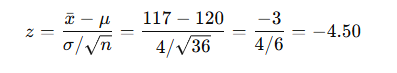

In [ ]:
# Cálculo do z
z = (x_bar - mu) / (sigma / np.sqrt(n))
p_value = norm.cdf(z)

print( z, p_value)

-4.5 3.3976731247300535e-06


In [ ]:
# Encontrar o z crítico para um teste unilateral à esquerda com alfa = 0.05
alpha = 0.05
z_critico = norm.ppf(alpha)

z_critico

np.float64(-1.6448536269514729)

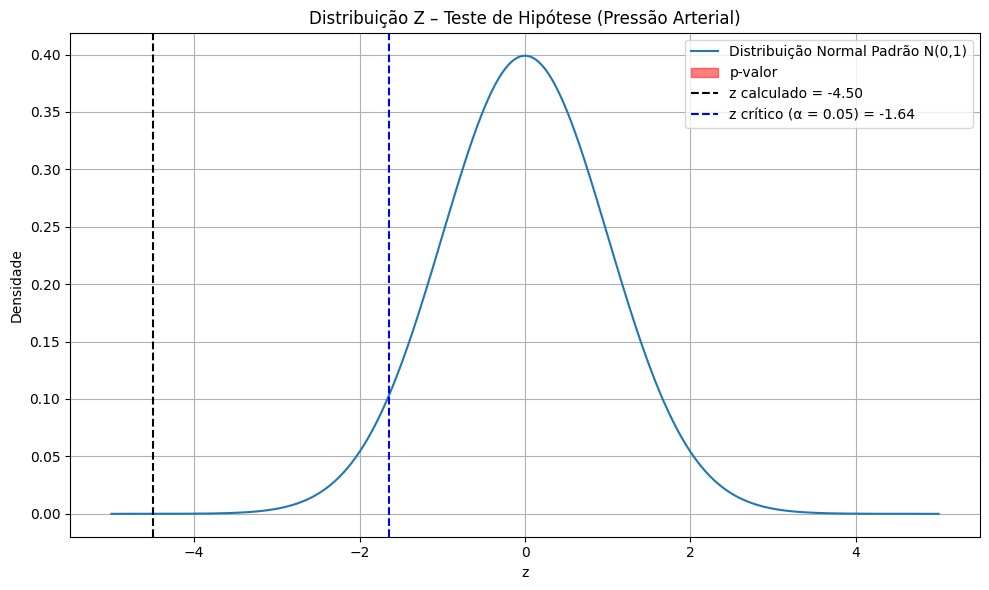

In [ ]:
# Gráfico da distribuição normal padr ão com p-valor
x = np.linspace(-5, 5, 1000) #Gera um array com 1000 valores igualmente espaçados entre -5 e 5.
y = norm.pdf(x) #A função norm.pdf vem de scipy.stats e representa a função densidade da normal padrão (média = 0, desvio = 1).

fig, ax = plt.subplots(figsize=(10, 6)) #Cria a figura e os eixos do gráfico com tamanho 10x6 polegadas.
ax.plot(x, y, label="Distribuição Normal Padrão N(0,1)") #Plota a curva da distribuição normal padrão com os valores calculados acima.
ax.fill_between(x, 0, y, where=(x <= z), color="red", alpha=0.5, label="p-valor") #Preenche a área abaixo da curva à esquerda do z calculado. Isso representa graficamente o p-valor,
ax.axvline(z, color="black", linestyle="--", label=f"z calculado = {z:.2f}") #Adiciona uma linha vertical preta tracejada no valor de z calculado, para indicar graficamente onde a estatística observada cai na curva.
ax.axvline(norm.ppf(alpha), color="blue", linestyle="--", label=f"z crítico (α = {alpha}) = {norm.ppf(alpha):.2f}") #Adiciona a linha vertical azul tracejada correspondente ao z crítico
ax.set_title("Distribuição Z – Teste de Hipótese (Pressão Arterial)")
ax.legend()
plt.xlabel("z")
plt.ylabel("Densidade")
plt.grid(True)
plt.tight_layout()
plt.show()

####📈 Passo 5 – Interprete os Resultados

* z crítico (cauda à esquerda, α = 0.05) ≈ -1.64
* Como z calculado é menor que o z crítico, estamos na zona de rejeição

Ou seja, qualquer valor menor que -1,6449 cairá na região de rejeição da hipótese nula (H₀), indicando evidência estatística significativa ao nível de 5%. Como a linha preta (z calculado) está além da linha azul (z crítico) na cauda esquerda, então rejeitamos H₀.

**Conclusão Prática (em saúde):**
Com 95% de confiança, podemos afirmar que a média da pressão arterial sistólica dos pacientes hipertensos controlados deste hospital é menor que 120 mmHg, indicando efetividade no controle clínico.

#🚫 Desvio padrão populacional desconhecido

Situação mais comum na vida real — especialmente quando temos apenas uma amostra e não conhecemos a população completa. Usamos o teste t de Student.

**🎯 Cenário:**

A direção da Unidade Básica de Saúde (UBS) define que o tempo médio de espera aceitável para atendimento deve ser de no máximo 26 minutos. Uma amostra de atendimentos será usada para testar essa meta.

In [ ]:
# Exemplo: tempo de espera em minutos para atendimento em uma UBS
dados_amostra = [24, 25, 22, 26, 27, 28, 23, 24, 25, 26]

#### 🧪 Especifique as Hipóteses

Uma amostra de atendimentos será usada para testar essa meta.

* H₀ (Hipótese nula): μ ≥ 26 minutos
* H₁ (Hipótese alternativa): μ < 26 minutos

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

####🧮 Passo 3 – Escolha o Teste Adequado

Temos:
* Apenas 1 amostra
* A variável é quantitativa contínua (tempo em minutos)
* O desvio padrão populacional não é conhecido
* A amostra é pequena (n = 10)

➡️ Usamos o teste t para uma amostra (one-sample t-test)



####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp, t

In [ ]:
n = len(dados_amostra)
media_amostral = np.mean(dados_amostra)
media_referencia = 26  # tempo médio de espera aceitável definido pela gestão
alpha = 0.05

# Teste t para uma amostra
t_stat, p_val = ttest_1samp(dados_amostra, popmean=media_referencia)

# Valor crítico t unilateral (left-tail)
gl = n - 1
t_critico = t.ppf(alpha, df=gl)

# Resultados
t_stat, p_val, t_critico, gl, media_amostral

(np.float64(-1.732050807568877),
 np.float64(0.11730680301423822),
 np.float64(-1.8331129326536337),
 9,
 np.float64(25.0))

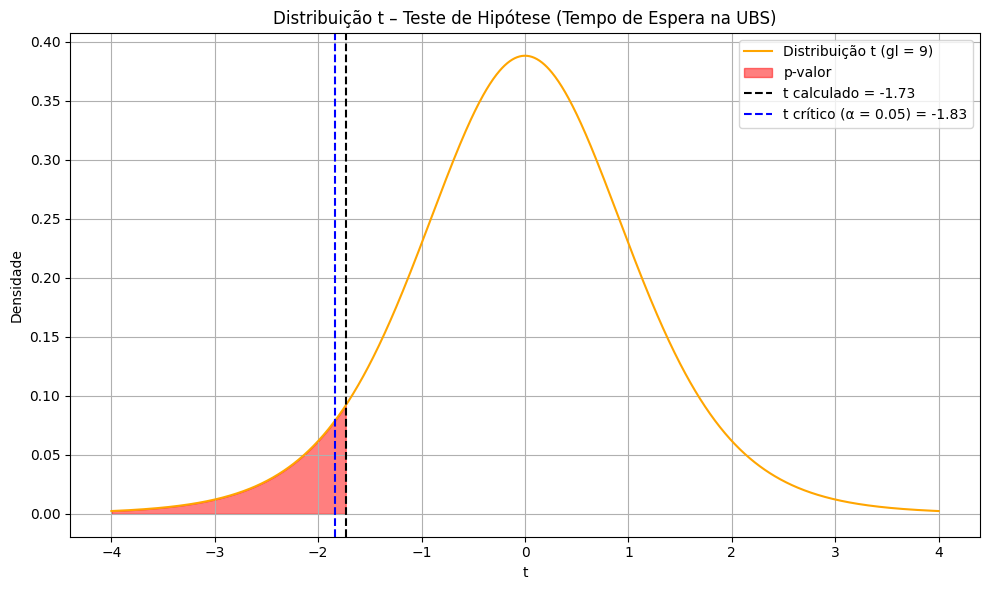

In [ ]:
# Gerar gráfico da distribuição t com t calculado e t crítico (caso UBS)
from scipy.stats import t
import matplotlib.pyplot as plt

# Parâmetros do caso
df = gl
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label=f"Distribuição t (gl = {df})", color="orange")

# Área do p-valor (cauda esquerda)
ax.fill_between(x, 0, y, where=(x <= t_stat), color="red", alpha=0.5, label="p-valor")

# Linhas verticais
ax.axvline(t_stat, color="black", linestyle="--", label=f"t calculado = {t_stat:.2f}")
ax.axvline(t_critico, color="blue", linestyle="--", label=f"t crítico (α = 0.05) = {t_critico:.2f}")

# Configurações do gráfico
ax.set_title("Distribuição t – Teste de Hipótese (Tempo de Espera na UBS)")
ax.set_xlabel("t")
ax.set_ylabel("Densidade")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


* Curva laranja: distribuição t com 9 graus de liberdade (gl = 9)
* Área vermelha: o p-valor, ou seja, a probabilidade de obter um t ≤ −1,73 se H₀ fosse verdadeira
* Linha preta tracejada: o t calculado = −1,73
* Linha azul tracejada: o t crítico = −1,83 (limite da zona de rejeição à esquerda)

####📈 Passo 5 – Interprete os Resultados

* O t calculado (−1,73) é maior que o t crítico (−1,83)

* O p-valor (0,117) é maior que α = 0,05

* Portanto, não rejeitamos H₀

**Conclusão Prática (em saúde):** Com base nesta amostra, não há evidência estatística suficiente para afirmar que o tempo médio de espera na UBS é menor que 26 minutos. A equipe deve monitorar continuamente os tempos de espera e ampliar a amostra, caso deseje uma decisão mais robusta.

#📊 Comparativo: Teste Z vs Teste t (para amostras dependentes)

* Teste Z: utilizado quando o desvio padrão populacional é conhecido
* Teste t: utilizado quando o desvio padrão é estimado da própria amostra

Ambos levam à mesma decisão de rejeitar H₀, mas com abordagens e distribuições diferentes.

Mesmo que um teste Z e um teste t partam de suposições diferentes (especialmente em relação ao desvio padrão populacional),  os dois testes tendem a dar resultados praticamente iguais.

> Testes Z e t são estatisticamente consistentes: quando ambos são aplicáveis, eles apontam praticamente sempre para a mesma decisão estatística. A escolha entre eles deve seguir critérios de boas práticas, não por expectativa de "resultado diferente".



⚠️ Quando poderiam divergir?
É muito raro, mas pode acontecer:
* Em amostras muito pequenas (n < 10), com: Distribuições muito assimétricas ou Outliers ou Estimativa de desvio muito instável
* Se alguém usasse indevidamente o teste Z com σ incorreto, isso poderia levar a conclusões erradas.

Mesmo assim, não é comum que um teste Z indique rejeição de H₀ e o teste t não, ou vice-versa, desde que aplicados corretamente.



## 🤔 Curiosidade sobre a distribuição t de Student

Nascido em Canterbury em 1876, Gosset estudou em Winchester e Oxford, onde se formou em química em 1897 e em matemática em 1899. Foi contratado pela cervejaria Guinness em Dublin, onde passou o resto da vida, principalmente em St. James Gate, em Dublin, e pelos últimos dois anos em Park Royal, em Londres. A formação acadêmica de Gosset pode parecer incompatível com seu emprego como cervejeiro, mas a Guinness percebeu, nessa época, que, para manter sua participação dominante no mercado como a maior cervejaria da Irlanda, teria que introduzir a produção de cerveja em escala industrial cuidadosamente controlada. Tal empreendimento exigiria um rigoroso controle de qualidade; daí a necessidade de químicos e estatísticos com formação universitária.

Como qualquer cervejeiro amador pode atestar, a produção de cerveja tem um elemento de incerteza, sendo o sucesso dependente não apenas do procedimento correto, mas também de um elemento de sorte! Foi essa dependência da sorte para um produto bem-sucedido que a Guinness buscou eliminar por meio de procedimentos científicos. Cerveja, é claro, é uma combinação de produtos naturais: cevada maltada, lúpulo e levedura, todos misturados com água. Esses produtos naturais compartilham uma variabilidade inerente comum a todos os produtos agrícolas, cuja qualidade depende não apenas da variedade da cultura, mas também do clima, das condições do solo, etc.

A tarefa de Gosset como Aprendiz de Cervejeiro não era apenas avaliar a qualidade desses produtos, mas também fazê-lo de maneira econômica. Isso exigia o uso de experimentos com pequenas amostras para tirar conclusões que pudessem ser aplicadas ao processo de fabricação de cerveja em larga escala. No entanto, Gosset descobriu que, ao usar pequenas amostras, a distribuição das médias se desviava da distribuição normal. Portanto, ele não podia usar métodos estatísticos convencionais baseados em uma distribuição normal para tirar suas conclusões.

Em 1904, Gosset publicou um relatório interno intitulado “A aplicação da 'Lei do Erro' ao trabalho da cervejaria”, onde descreveu como “quanto maior o número de observações das quais médias são tomadas, menor o erro (provável)”. Gosset também observou como, em comparação com uma distribuição normal, “a curva que representa a frequência do erro torna-se mais alta e estreita” à medida que o tamanho da amostra diminui. A diretoria do Guinness percebeu o potencial impacto da economia de custos do estudo e sugeriu que Gosset consultasse um matemático profissional.

Gosset, então, escreveu a Karl Pearson na UCL, e eles se encontraram em 12 de julho de 1905, enquanto Gosset estava de férias na Inglaterra. Esse encontro levou a um convite para Gosset visitar o departamento de Pearson na UCL em 1906/07 por um ano, onde trabalhou em seu problema de pequenas amostras.

Em 1908, Gosset publicou o fruto de seu trabalho em um artigo intitulado “O erro provável de uma média” no periódico Biometrica (Student, 1908), do qual Pearson era editor. No entanto, o Guinness tinha uma política de não publicar dados da empresa e permitiu que Gosset publicasse suas observações sob o estrito entendimento de que ele o faria anonimamente e não utilizaria nenhum dado da empresa. Gosset concordou e publicou sob o pseudônimo “Student” — o nome sob o qual ele publicaria 19 de suas 21 publicações. O nome Student aparentemente veio da capa de um caderno que Gosset usava na época — The Student’s Science Notebook (Ziliak, 2008).

Em seu artigo clássico, Gosset afirma que “qualquer série de experimentos só tem valor na medida em que nos permite formar um julgamento quanto ao conteúdo estatístico da população à qual o experimento pertence”. Ou, dito de outra forma — tendo n observações, Gosset queria saber dentro de quais limites a média da população amostrada se encontrava.

No artigo, Gosset deriva parcialmente a distribuição do erro (denominada z) e fornece valores de z de n = 4 a 10. Esta tabela é expressa como uma função de distribuição cumulativa em relação a n e z. Os cálculos necessários para gerar a tabela de valores de z eram muito trabalhosos e levaram Gosset cerca de 6 meses para computar em uma calculadora mecânica.

O próprio Gosset não tinha pretensões acadêmicas e se apresenta como um homem pragmático. Ele desdenhava sua habilidade matemática, afirmando que os limites de suas capacidades “paravam em Matemática, Mods [exames finais] em Oxford, consequentemente, não tenho faculdade na área” (Gosset, 1962). Gosset claramente não era nenhum bobo, mas suas habilidades matemáticas não estavam no mesmo nível de Fisher ou Pearson. O fato de sua derivação de t ser incompleta e parcialmente adivinhada corrobora esse ponto, mas a distribuição t totalmente derivada de Fisher em 1925 mostrou que a intuição de Gosset estava correta.

De fato, Fisher comenta que “qualquer analista capaz poderia ter lhe mostrado a demonstração de que ele precisava”. Os cálculos de Gosset frequentemente continham pequenos erros, e ele preferia fazê-los no verso de envelopes e pedaços de papel (McMullen, 1939), um amadorismo cativante reforçado apenas por comentários como “In a similar tedious way we find” (De forma similar e tediosa, encontramos) durante uma derivação mais extensa (Student, 1908).

No entanto, a distribuição t permitiu que Gosset prosseguisse com seu trabalho para a Guinness, e ele foi promovido a cervejeiro-chefe experimental e chefe de estatística, e finalmente, em 1935, promovido a Cervejeiro-Chefe, cargo que ocupou até sua morte, dois anos depois.

Em conclusão, fisiologistas (e muitos outros cientistas experimentais) têm uma dívida de gratidão com Gosset por tornar obsoleta a dependência de grandes tamanhos de amostra para determinar diferenças entre grupos de dados. A distribuição t permite aos experimentadores a liberdade de usar tamanhos de amostra pequenos, com a confiança de que não estão comprometendo a validade de quaisquer conclusões tiradas: de fato, a política de Redução, Refinamento e Substituição do Ministério do Interior em relação a experimentos com animais seria impossível sem a distribuição t.

O fato de Gosset, certamente o herói anônimo da estatística do século XX, ter feito um avanço tão enorme no campo da estatística se deve quase certamente à sua aplicação da teoria para resolver problemas práticos. Em uma carta a Fisher sobre suas distribuições t, Gosset lamentou que “você é o único homem que provavelmente as usará”. Uma olhada em qualquer edição do The Journal of Physiology servirá para ilustrar a ubiquidade do teste t de Student nas ciências biológicas e demonstrar o quão inconsciente Gosset estava do impacto revolucionário que seu trabalho teria em todos os campos da biologia e além.

